In [148]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataktra/data-kiem-tra-1.csv


In [149]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.mixture import BayesianGaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
from cv2 import Rodrigues
from math import sin, cos, atan2, sqrt
import pandas as pd
from pathlib import Path
import pyproj
from pyproj import Proj, transform
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, TimeSeriesSplit
from sklearn.metrics import accuracy_score
import lightgbm as lgb
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore", category=Warning)

### Đọc dữ liệu

In [150]:
df = pd.read_csv('/kaggle/input/dataktra/data-kiem-tra-1.csv', encoding='latin-1', sep=',')
df.head(5)

,date,truong_1,truong_2,truong_3,truong_4,truong_5
0,02.01.2013,0,59,22154,999.00,1
1,03.01.2013,0,25,2552,899.00,1
2,05.01.2013,0,25,2552,899.00,-1
3,06.01.2013,0,25,2554,1709.05,1
4,15.01.2013,0,25,2555,1099.00,1


### Trực quan hóa dữ liệu

<Axes: >

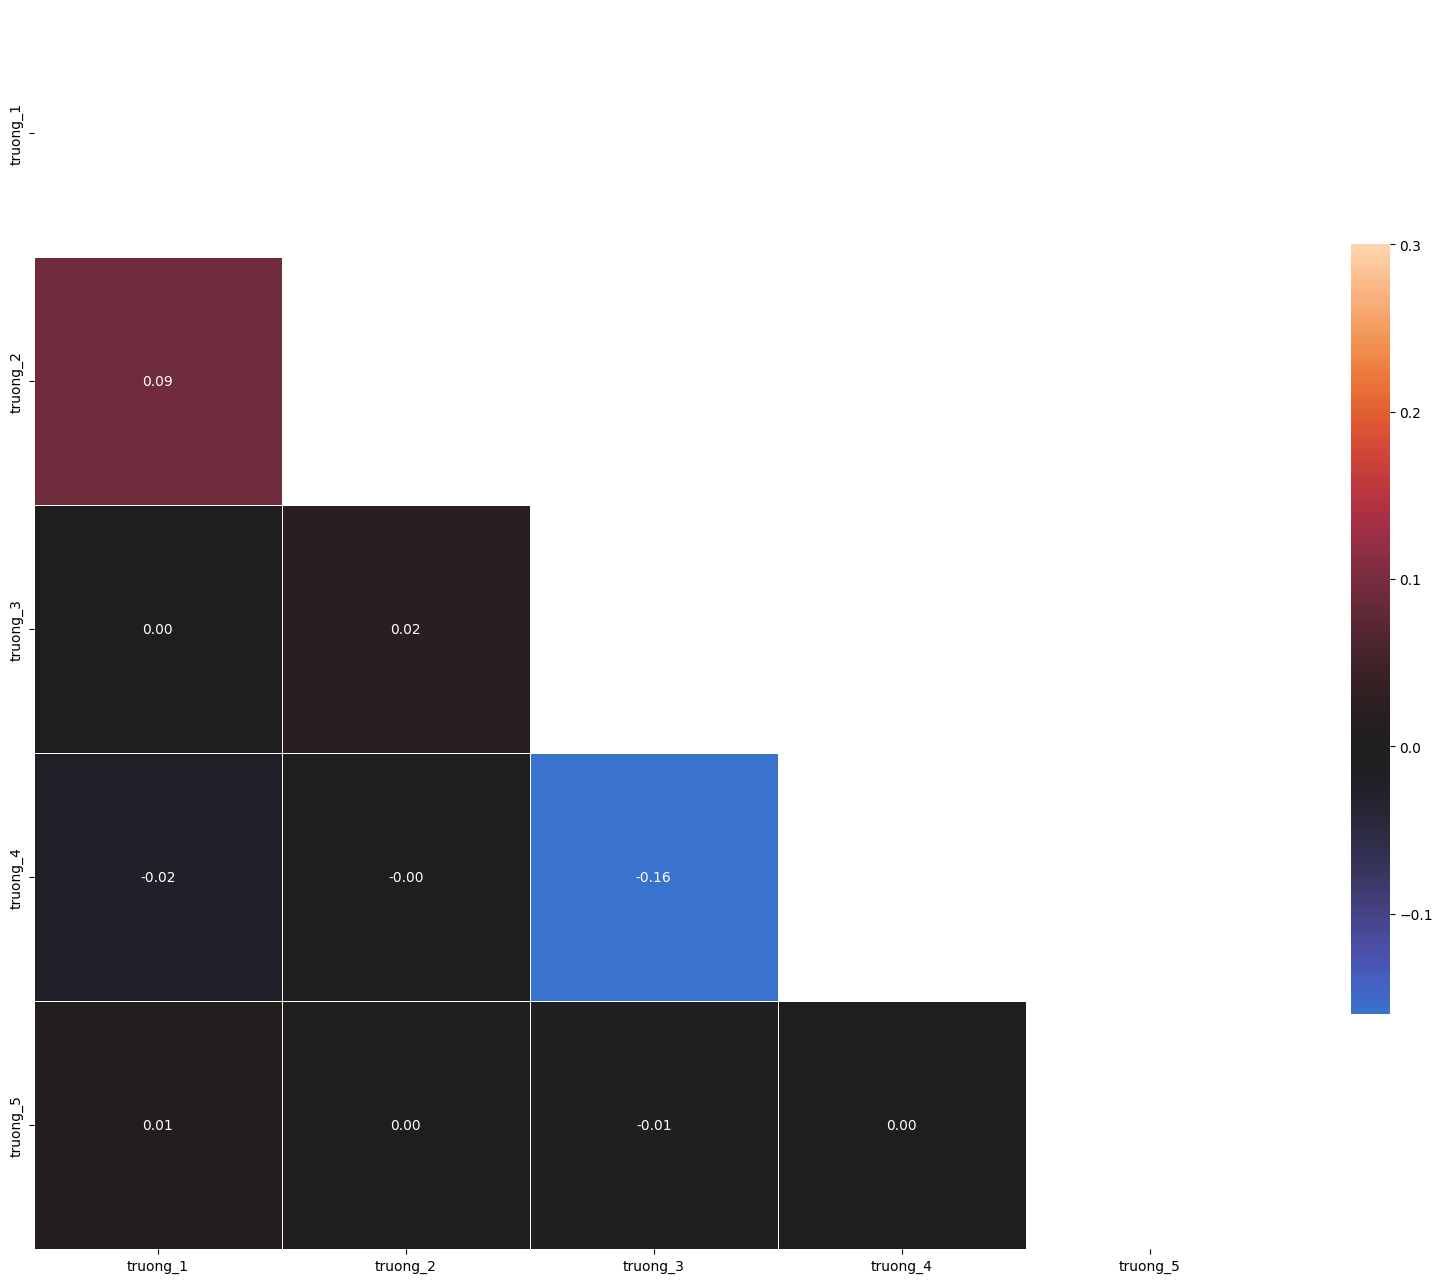

In [151]:
df_toheat= df.drop(labels='date', axis=1)
mask = np.triu(np.ones_like(df_toheat.corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df_toheat.corr(), mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True,fmt='.2f')

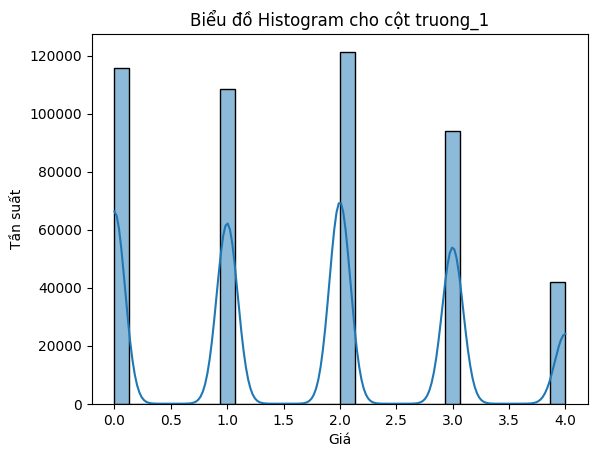

In [152]:
# Tạo biểu đồ histogram bằng seaborn
sns.histplot(df['truong_1'], bins=30, kde=True)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ Histogram cho cột truong_1')
plt.xlabel('Giá')
plt.ylabel('Tần suất')

# Hiển thị biểu đồ
plt.show()

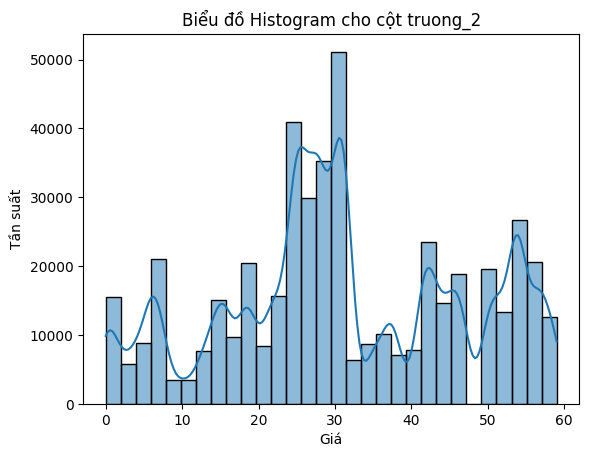

In [153]:
# Tạo biểu đồ histogram bằng seaborn
sns.histplot(df['truong_2'], bins=30, kde=True)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ Histogram cho cột truong_2')
plt.xlabel('Giá')
plt.ylabel('Tần suất')

# Hiển thị biểu đồ
plt.show()

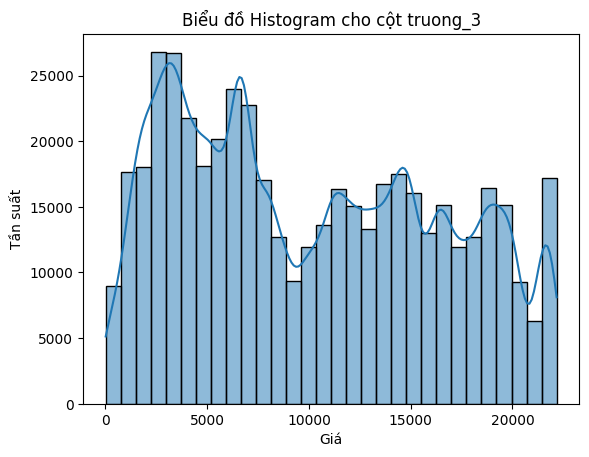

In [154]:
# Tạo biểu đồ histogram bằng seaborn
sns.histplot(df['truong_3'], bins=30, kde=True)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ Histogram cho cột truong_3')
plt.xlabel('Giá')
plt.ylabel('Tần suất')

# Hiển thị biểu đồ
plt.show()

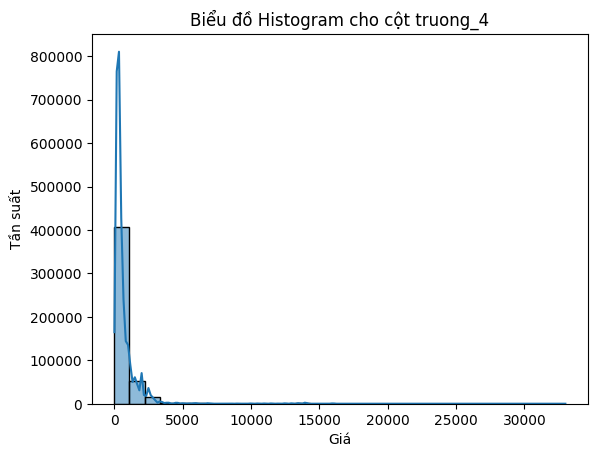

In [155]:
# Tạo biểu đồ histogram bằng seaborn
sns.histplot(df['truong_4'], bins=30, kde=True)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ Histogram cho cột truong_4')
plt.xlabel('Giá')
plt.ylabel('Tần suất')

# Hiển thị biểu đồ
plt.show()

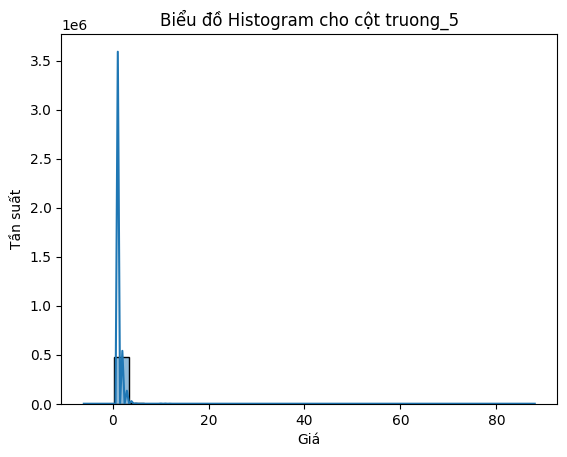

In [156]:
# Tạo biểu đồ histogram bằng seaborn
sns.histplot(df['truong_5'], bins=30, kde=True)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ Histogram cho cột truong_5')
plt.xlabel('Giá')
plt.ylabel('Tần suất')

# Hiển thị biểu đồ
plt.show()

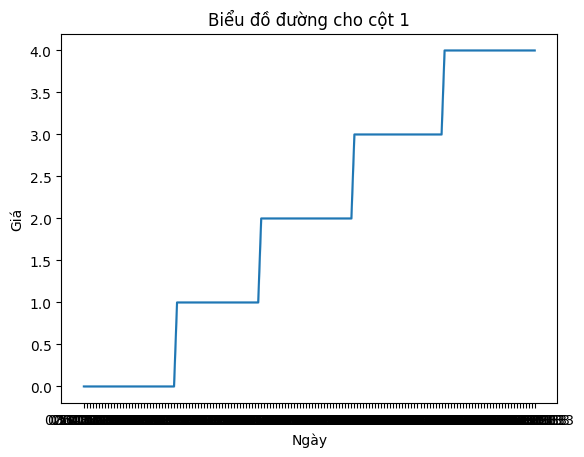

In [157]:
# Tạo biểu đồ đường bằng seaborn
sns.lineplot(x=df['date'], y=df['truong_1'], data=df)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ đường cho cột 1')
plt.xlabel('Ngày')
plt.ylabel('Giá')

# Hiển thị biểu đồ
plt.show()

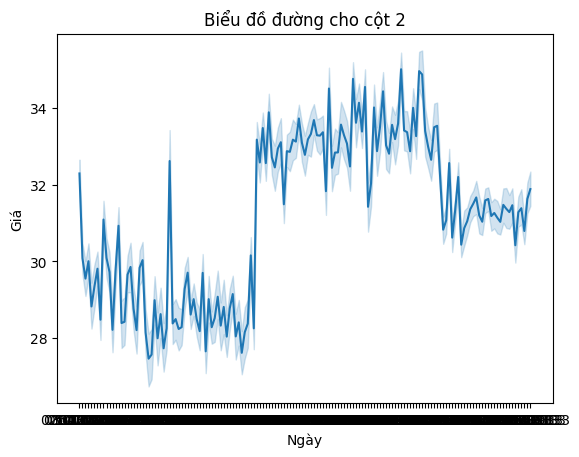

In [158]:
# Tạo biểu đồ đường bằng seaborn
sns.lineplot(x=df['date'], y=df['truong_2'], data=df)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ đường cho cột 2')
plt.xlabel('Ngày')
plt.ylabel('Giá')

# Hiển thị biểu đồ
plt.show()

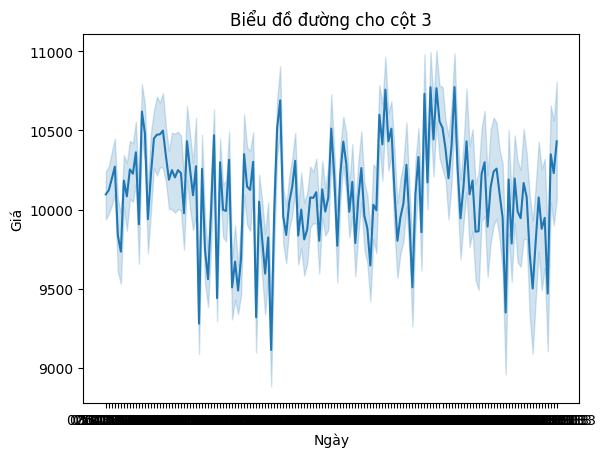

In [159]:
# Tạo biểu đồ đường bằng seaborn
sns.lineplot(x=df['date'], y=df['truong_3'], data=df)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ đường cho cột 3')
plt.xlabel('Ngày')
plt.ylabel('Giá')

# Hiển thị biểu đồ
plt.show()

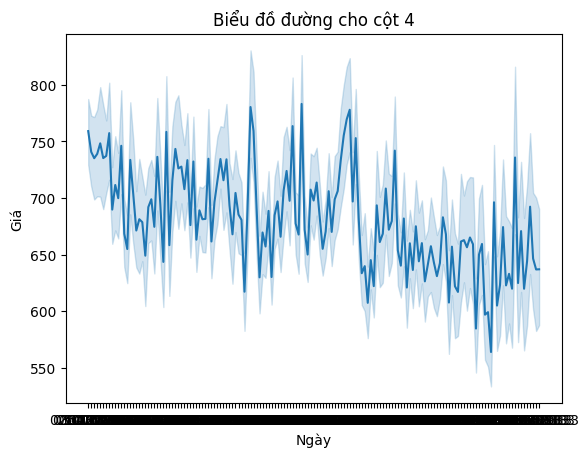

In [160]:
# Tạo biểu đồ đường bằng seaborn
sns.lineplot(x=df['date'], y=df['truong_4'], data=df)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ đường cho cột 4')
plt.xlabel('Ngày')
plt.ylabel('Giá')

# Hiển thị biểu đồ
plt.show()

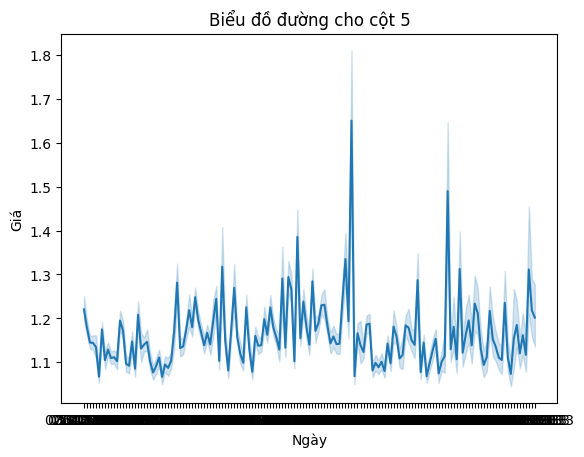

In [161]:
# Tạo biểu đồ đường bằng seaborn
sns.lineplot(x=df['date'], y=df['truong_5'], data=df)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ đường cho cột 5')
plt.xlabel('Ngày')
plt.ylabel('Giá')

# Hiển thị biểu đồ
plt.show()

### Tiền xử lí dữ liệu

In [162]:
df = df.drop_duplicates(subset=['date'])

In [163]:
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
df.set_index('date', inplace=True)

In [164]:
df = df.sort_values(by='date')
df.index = np.arange(1, len(df)+1)

### Áp dụng mô hình Arima

In [165]:
pip install pandas statsmodels matplotlib


Note: you may need to restart the kernel to use updated packages.


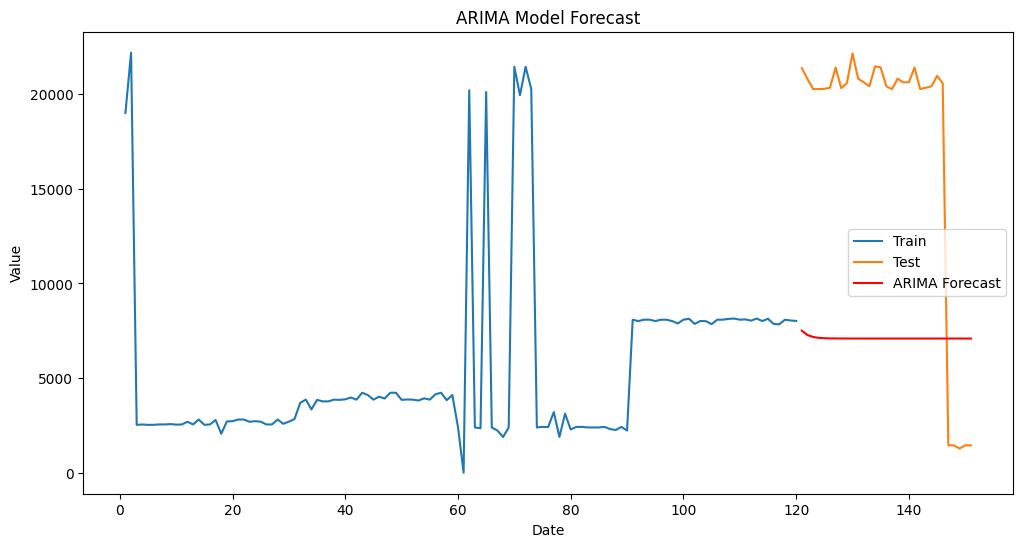

120    7513.827024
121    7284.866099
122    7182.311567
123    7136.376078
124    7115.800984
125    7106.585136
126    7102.457240
127    7100.608302
128    7099.780139
129    7099.409194
130    7099.243043
131    7099.168622
132    7099.135288
133    7099.120357
134    7099.113669
135    7099.110674
136    7099.109332
137    7099.108731
138    7099.108462
139    7099.108342
140    7099.108288
141    7099.108263
142    7099.108252
143    7099.108248
144    7099.108245
145    7099.108244
146    7099.108244
147    7099.108244
148    7099.108244
149    7099.108244
150    7099.108244
Name: predicted_mean, dtype: float64


In [166]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Chọn cột 'truong_1' để phân tích chuỗi thời gian
time_series = df['truong_3']
# Chia dữ liệu thành tập huấn luyện (train) và tập kiểm tra (test)
train_size = int(len(time_series) * 0.8)
train, test = time_series[:train_size], time_series[train_size:]
p = 1
d = 1
q = 1

# Khớp mô hình ARIMA
arima_model = ARIMA(train, order=(p, d, q))
arima_fit = arima_model.fit()

# Dự báo cho tập kiểm tra
forecast_steps = len(test)
arima_forecast = arima_fit.forecast(steps=forecast_steps)

# Vẽ biểu đồ chuỗi thời gian gốc, tập huấn luyện, tập kiểm tra và dự báo ARIMA
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='red')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# In kết quả dự báo
print(arima_forecast)

In [167]:
arima_pred = arima_fit.predict(start = len(train), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

120    7513.827024
121    7284.866099
122    7182.311567
123    7136.376078
124    7115.800984
125    7106.585136
126    7102.457240
127    7100.608302
128    7099.780139
129    7099.409194
130    7099.243043
131    7099.168622
132    7099.135288
133    7099.120357
134    7099.113669
135    7099.110674
136    7099.109332
137    7099.108731
138    7099.108462
139    7099.108342
140    7099.108288
141    7099.108263
142    7099.108252
143    7099.108248
144    7099.108245
145    7099.108244
146    7099.108244
147    7099.108244
148    7099.108244
149    7099.108244
150    7099.108244
Name: ARIMA Predictions, dtype: float64

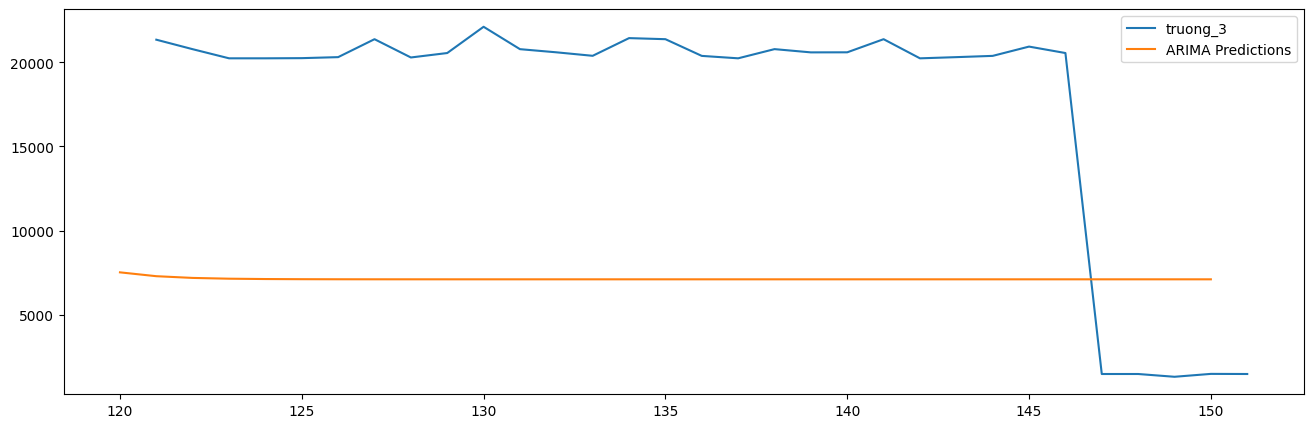

In [168]:
test.plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [169]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
# Tính các độ đo đánh giá
mae = mean_absolute_error(test, arima_forecast)
mse = mean_squared_error(test, arima_forecast)
rmse = np.sqrt(mse)

# In các độ đo đánh giá
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 12304.662690149731
Mean Squared Error (MSE): 160090547.02552405
Root Mean Squared Error (RMSE): 12652.689319884688


### Áp dụng mô hình SARIMA

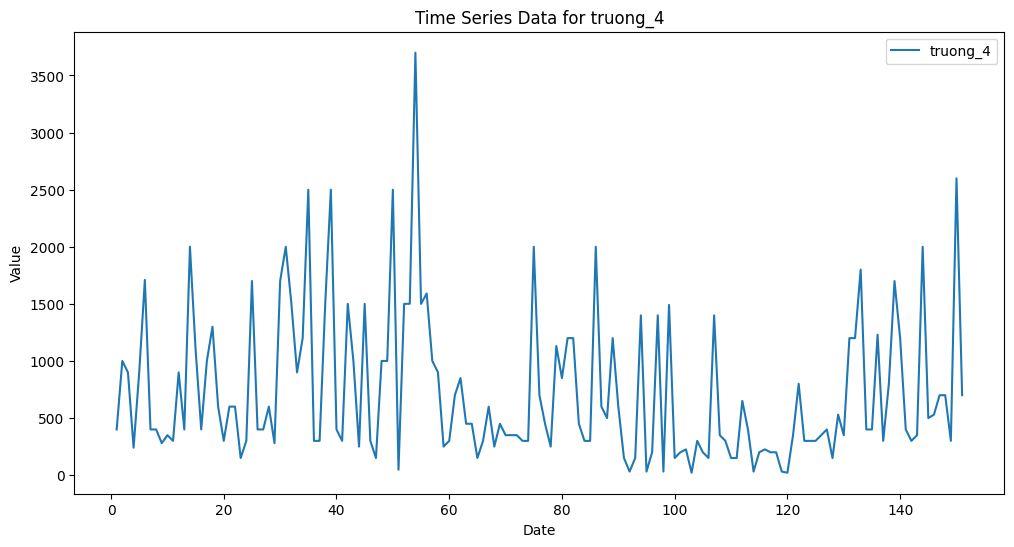

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.23073D+00    |proj g|=  4.61053D-02


 This problem is unconstrained.



At iterate    5    f=  7.21865D+00    |proj g|=  9.53362D-03

At iterate   10    f=  7.21709D+00    |proj g|=  4.75702D-04

At iterate   15    f=  7.21518D+00    |proj g|=  1.43594D-02

At iterate   20    f=  7.14009D+00    |proj g|=  6.65504D-02

At iterate   25    f=  7.12566D+00    |proj g|=  3.61014D-03

At iterate   30    f=  7.12474D+00    |proj g|=  4.47645D-04

At iterate   35    f=  7.12467D+00    |proj g|=  5.24563D-04

At iterate   40    f=  7.12466D+00    |proj g|=  2.71112D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42     49      1     0     0   9.453D-05   7.125D+00
  F =   7.12465826358

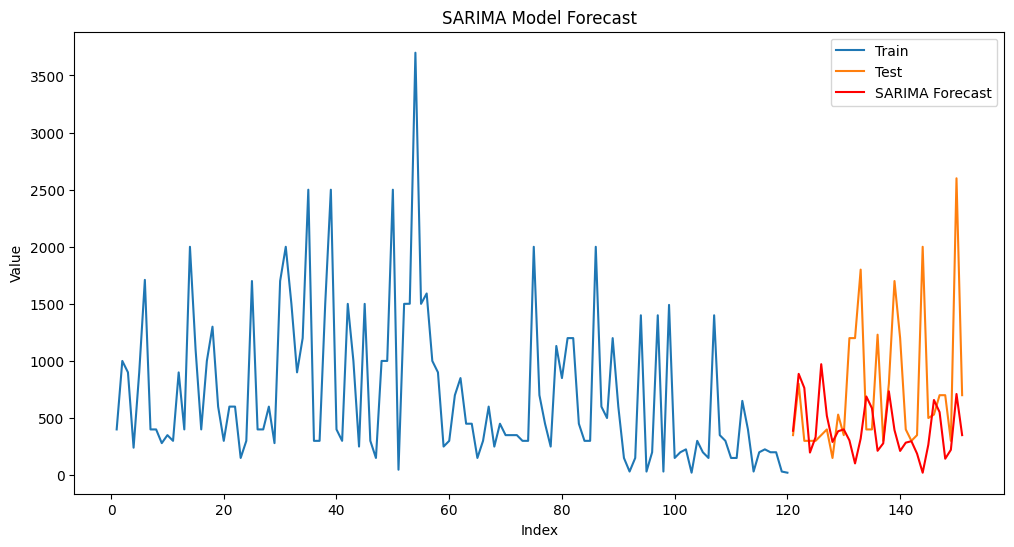

120    387.219379
121    885.866985
122    762.593907
123    196.440176
124    331.503818
125    970.506372
126    517.819980
127    289.116337
128    383.382423
129    399.038794
130    303.533026
131    101.227110
132    318.978022
133    687.760411
134    584.870653
135    211.917049
136    277.030204
137    733.051652
138    393.212086
139    210.651154
140    283.177305
141    295.991731
142    187.145316
143     19.746698
144    264.629071
145    656.984545
146    550.394815
147    142.371596
148    220.182137
149    709.418247
150    349.094767
Name: predicted_mean, dtype: float64


In [170]:

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Chọn cột 'truong_1' để phân tích chuỗi thời gian
time_series = df['truong_4']
train_size = int(len(time_series) * 0.8)
train, test = time_series[:train_size], time_series[train_size:]
# Vẽ biểu đồ chuỗi thời gian
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='truong_4')
plt.title('Time Series Data for truong_4')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Áp dụng mô hình SARIMA
# Chọn các tham số (p, d, q) và (P, D, Q, s) cho mô hình SARIMA
p = 1
d = 1
q = 1
P = 1
D = 1
Q = 1
s = 12  # Chu kỳ mùa vụ, ví dụ 12 cho dữ liệu hàng tháng

# Khớp mô hình SARIMA
sarima_model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_fit = sarima_model.fit()

forecast_steps = len(test)
sarima_forecast = sarima_fit.forecast(steps=forecast_steps)
# Vẽ biểu đồ chuỗi thời gian gốc, tập huấn luyện, tập kiểm tra và dự báo ARIMA
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast', color='red')
plt.title('SARIMA Model Forecast')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

# In kết quả dự báo
print(sarima_forecast)

In [171]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
# Tính các độ đo đánh giá
mae = mean_absolute_error(test, sarima_forecast)
mse = mean_squared_error(test, sarima_forecast)
rmse = np.sqrt(mse)

# In các độ đo đánh giá
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 477.18408364508946
Mean Squared Error (MSE): 541137.2703678545
Root Mean Squared Error (RMSE): 735.6203303116728


### Áp dụng mô hình HMM

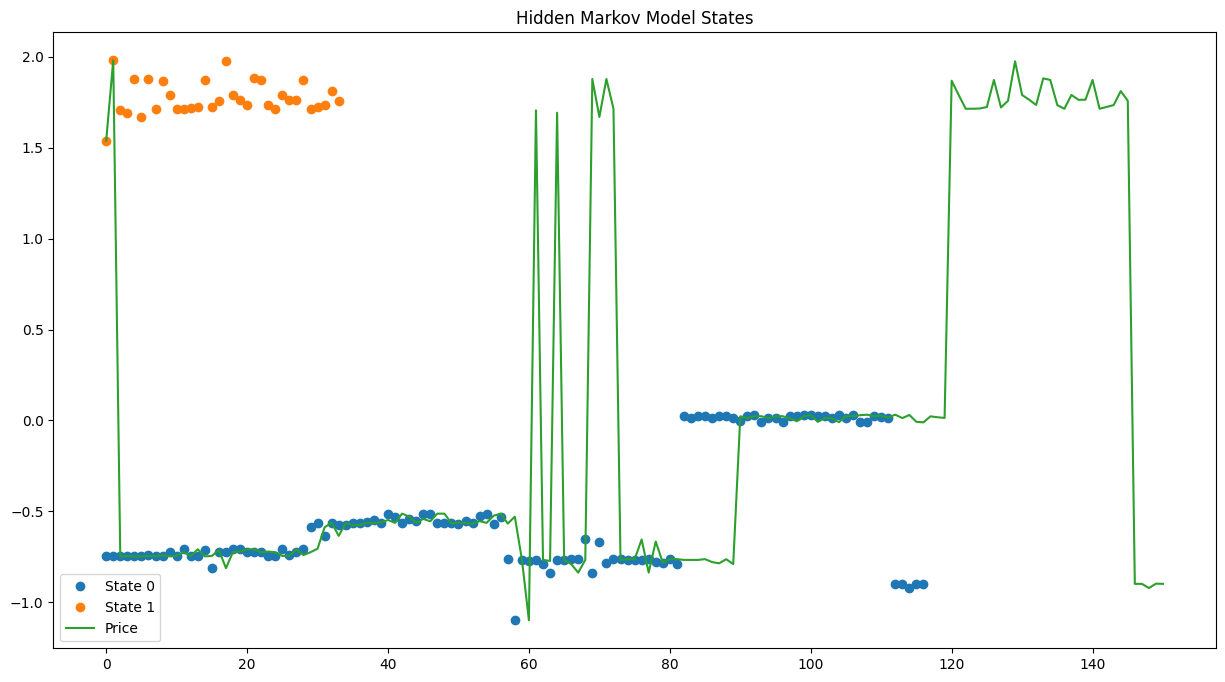

In [172]:
from hmmlearn import hmm
# Assuming your data has columns 'Price1', 'Price2', 'Price3'
prices = df[['truong_3']].values

# Normalize the data
prices = (prices - np.mean(prices, axis=0)) / np.std(prices, axis=0)

# Define the HMM model
model = hmm.GaussianHMM(n_components=2, covariance_type="diag", n_iter=100)

# Fit the model
model.fit(prices)

# Predict hidden states
hidden_states = model.predict(prices)

# Plot the results
plt.figure(figsize=(15, 8))
for i in range(model.n_components):
    state = (hidden_states == i)
    plt.plot(prices[state, 0], 'o', label=f'State {i}')
plt.plot(prices[:, 0], label='Price')
plt.legend()
plt.title('Hidden Markov Model States')
plt.show()

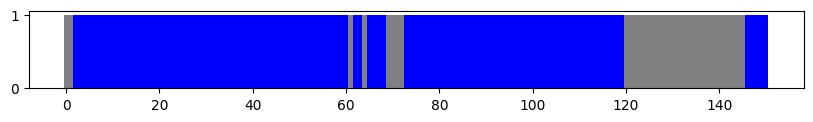

In [173]:
state2color = {} 
state2color['0'] = 'blue'
state2color['1'] = 'grey'

def plot_weather_samples(samples, state2color): 
    colors = [state2color[str(x)] for x in samples]
    x = np.arange(0, len(colors))
    y = np.ones(len(colors))
    plt.figure(figsize=(10,1))
    plt.bar(x, y, color=colors, width=1)
    
plot_weather_samples(hidden_states, state2color)